# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

env = UnityEnvironment(file_name='data/Reacher_Linux_one_arm/Reacher_Linux/Reacher.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [4]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from ddpg_agent_Copy2 import Agent

/home/mond/virt_env/DRLND/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 2.19
Episode 200	Average Score: 3.45
Episode 300	Average Score: 4.76
Episode 400	Average Score: 6.26
Episode 500	Average Score: 9.69
Episode 600	Average Score: 10.79
Episode 700	Average Score: 12.21
Episode 800	Average Score: 14.85
Episode 900	Average Score: 17.17
Episode 1000	Average Score: 17.96
Episode 1100	Average Score: 19.90
Episode 1200	Average Score: 23.27
Episode 1300	Average Score: 26.34
Episode 1400	Average Score: 28.59
Episode 1430	Average Score: 30.16
Environment solved in 1330 episodes!
Episode 1431	Average Score: 30.21
Environment solved in 1331 episodes!
Episode 1432	Average Score: 30.14
Environment solved in 1332 episodes!
Episode 1433	Average Score: 30.19
Environment solved in 1333 episodes!
Episode 1434	Average Score: 30.19
Environment solved in 1334 episodes!
Episode 1435	Average Score: 30.19
Environment solved in 1335 episodes!
Episode 1436	Average Score: 30.26
Environment solved in 1336 episodes!
Episode 1437	Average Score: 30.37
Environ

Episode 1539	Average Score: 32.35
Environment solved in 1439 episodes!
Episode 1540	Average Score: 32.40
Environment solved in 1440 episodes!
Episode 1541	Average Score: 32.43
Environment solved in 1441 episodes!
Episode 1542	Average Score: 32.50
Environment solved in 1442 episodes!
Episode 1543	Average Score: 32.47
Environment solved in 1443 episodes!
Episode 1544	Average Score: 32.47
Environment solved in 1444 episodes!
Episode 1545	Average Score: 32.56
Environment solved in 1445 episodes!
Episode 1546	Average Score: 32.71
Environment solved in 1446 episodes!
Episode 1547	Average Score: 32.70
Environment solved in 1447 episodes!
Episode 1548	Average Score: 32.73
Environment solved in 1448 episodes!
Episode 1549	Average Score: 32.73
Environment solved in 1449 episodes!
Episode 1550	Average Score: 32.81
Environment solved in 1450 episodes!
Episode 1551	Average Score: 32.81
Environment solved in 1451 episodes!
Episode 1552	Average Score: 32.93
Environment solved in 1452 episodes!
Episod

Episode 1654	Average Score: 36.88
Environment solved in 1554 episodes!
Episode 1655	Average Score: 36.89
Environment solved in 1555 episodes!
Episode 1656	Average Score: 36.89
Environment solved in 1556 episodes!
Episode 1657	Average Score: 36.87
Environment solved in 1557 episodes!
Episode 1658	Average Score: 36.90
Environment solved in 1558 episodes!
Episode 1659	Average Score: 36.91
Environment solved in 1559 episodes!
Episode 1660	Average Score: 36.91
Environment solved in 1560 episodes!
Episode 1661	Average Score: 36.92
Environment solved in 1561 episodes!
Episode 1662	Average Score: 36.94
Environment solved in 1562 episodes!
Episode 1663	Average Score: 36.95
Environment solved in 1563 episodes!
Episode 1664	Average Score: 36.97
Environment solved in 1564 episodes!
Episode 1665	Average Score: 37.01
Environment solved in 1565 episodes!
Episode 1666	Average Score: 37.04
Environment solved in 1566 episodes!
Episode 1667	Average Score: 37.05
Environment solved in 1567 episodes!
Episod

Episode 1769	Average Score: 38.43
Environment solved in 1669 episodes!
Episode 1770	Average Score: 38.45
Environment solved in 1670 episodes!
Episode 1771	Average Score: 38.46
Environment solved in 1671 episodes!
Episode 1772	Average Score: 38.47
Environment solved in 1672 episodes!
Episode 1773	Average Score: 38.49
Environment solved in 1673 episodes!
Episode 1774	Average Score: 38.46
Environment solved in 1674 episodes!
Episode 1775	Average Score: 38.45
Environment solved in 1675 episodes!
Episode 1776	Average Score: 38.45
Environment solved in 1676 episodes!
Episode 1777	Average Score: 38.45
Environment solved in 1677 episodes!
Episode 1778	Average Score: 38.47
Environment solved in 1678 episodes!
Episode 1779	Average Score: 38.48
Environment solved in 1679 episodes!
Episode 1780	Average Score: 38.46
Environment solved in 1680 episodes!
Episode 1781	Average Score: 38.47
Environment solved in 1681 episodes!
Episode 1782	Average Score: 38.47
Environment solved in 1682 episodes!
Episod

Episode 1884	Average Score: 38.58
Environment solved in 1784 episodes!
Episode 1885	Average Score: 38.58
Environment solved in 1785 episodes!
Episode 1886	Average Score: 38.56
Environment solved in 1786 episodes!
Episode 1887	Average Score: 38.57
Environment solved in 1787 episodes!
Episode 1888	Average Score: 38.57
Environment solved in 1788 episodes!
Episode 1889	Average Score: 38.57
Environment solved in 1789 episodes!
Episode 1890	Average Score: 38.56
Environment solved in 1790 episodes!
Episode 1891	Average Score: 38.57
Environment solved in 1791 episodes!
Episode 1892	Average Score: 38.57
Environment solved in 1792 episodes!
Episode 1893	Average Score: 38.57
Environment solved in 1793 episodes!
Episode 1894	Average Score: 38.57
Environment solved in 1794 episodes!
Episode 1895	Average Score: 38.57
Environment solved in 1795 episodes!
Episode 1896	Average Score: 38.56
Environment solved in 1796 episodes!
Episode 1897	Average Score: 38.57
Environment solved in 1797 episodes!
Episod

Episode 1999	Average Score: 39.06
Environment solved in 1899 episodes!
Episode 2000	Average Score: 39.06
Environment solved in 1900 episodes!
Episode 2000	Average Score: 39.06


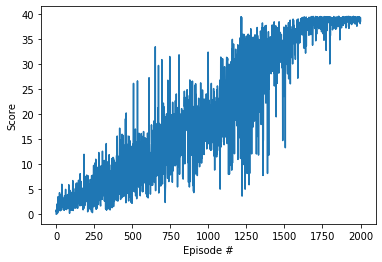

In [5]:
def ddpg(n_episodes=2000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        #state = env.reset()
        agent.reset()

        state = env_info.vector_observations[0]
        score = 0 #np.zeros(num_agents) #0

        
        for t in range(max_t):
            action = agent.act(state)
            #next_state, reward, done, _ = env.step(action)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]#[0]   # get the next state
            reward = env_info.rewards[0]#[0]                   # get the reward
            done = env_info.local_done[0]#[0]                  # see if episode has finished
            
            
            agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        mean_score = np.mean(scores_deque)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_score), end="")
        if mean_score >= 30:
            torch.save(agent.actor_local.state_dict(), '1-arm_actor.pth')
            torch.save(agent.critic_local.state_dict(), '1-arm_critic.pth')
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))
            
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
            
    return scores


#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#env.close()